In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegression

In [58]:
df = pd.read_csv('IRIS.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Checking for typos in classes' names in the species col

In [59]:
species_list = df['species'].unique()
print(species_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In the species column:
versicolor->0
setosa->1
virginica->2

In [60]:
final_df = df.copy()
final_df['species'] = final_df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
final_df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [61]:
final_df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

The correlation matrix (between each two columns)

(just check the entries below the diagonal line, since whatever above it is a reflected copy of below)


In [62]:
final_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


petal_width and petal_length are highly correlated (0.978856)

In [63]:
petal_length_col = final_df['petal_length']
petal_width_col = final_df['petal_width']

Let's investigate their correlation further using a 2D plot

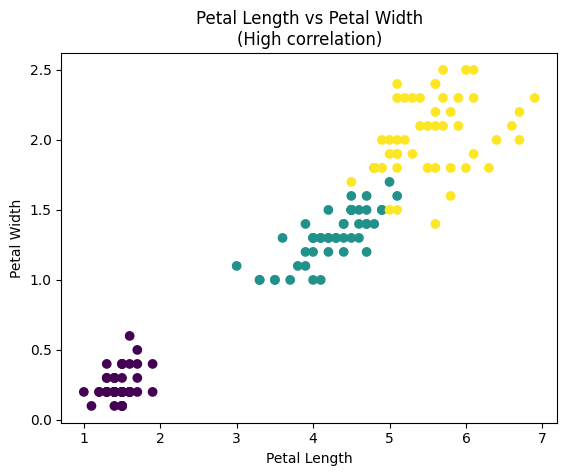

In [64]:
plt.scatter(petal_length_col, petal_width_col, c=final_df['species'], cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width\n(High correlation)')
plt.show()

If data points here were to be projected upon the x or y axis (one of the variables was removed), the remaining variable would still be able to classify those points into distinct classes.
This is bad, reall bad, and implies that one of our features are redundant and should be removed.
I'll pick the petal_length (to be removed).

In [65]:
final_df.drop(columns='petal_length', inplace=True)
final_df.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0


For reference, here's how a plot of two features with low-correlation looks like:

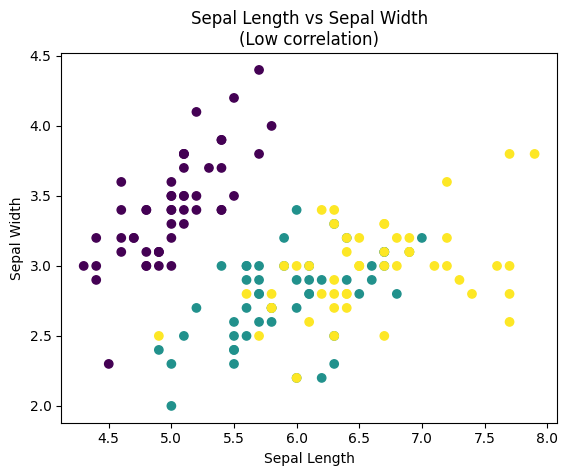

In [66]:
plt.scatter(final_df['sepal_length'], final_df['sepal_width'], c=final_df['species'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width\n(Low correlation)')
plt.show()

In [67]:
x = final_df.drop(columns="species")
y = final_df["species"]
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Model Construction

In [72]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)

LOGR = LogisticRegression()
LOGR.fit(x_train, y_train)
log_pred = LOGR.predict(x_test)

# KNN vs LOGR
print(f'KNN model accuracy: {accuracy_score(y_test, KNN_pred)}')
print(f'LOGR model accuracy: {accuracy_score(y_test, log_pred)}')


KNN model accuracy: 1.0
LOGR model accuracy: 1.0
